#Chapter 1: Linear Algebra



---



In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import qr

##1.1: Introduction

The field of linear algebra that is used in various disciplines. Concepts from linear algebra can be used in data science or machine learning algorithms. Topics covered in this section include orthogonality, eigenvalue/eigenvector, and linear regression.

## 1.2: Elements of Linear Algebra

### 1.2.1: Linear Spaces

A linear combination occurs when we mutiply a vector by a constant and add the results. A linear subspace is a result of linear combination.

A linear subspace of $V$ is a subset $U\subseteq V$ that is closed under addition and multiplication:

For $u_1, u_2 \in U$ and $\alpha \in \mathbb{R}$, $$u_1+u_2\in U \text{ and } \alpha u_1\in U$$

Additionally a span of a set of vectors is a linear subspace, with span meaning the set of all linear combinations.

Let $w_1,...,w_m\in V$. Then $span(w_1,...,w_m)=  \sum_{j=1}^{m} \alpha_jw_j:\alpha_1,...,\alpha_m\in \mathbb{R}$

NumPy has a ```linspace``` function which creates a sequence of evenly spaced values within a defined interval. This sequence is a vector space.



The first linspace is [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ].
The second linspace is [7.  6.5 6.  5.5 5. ].


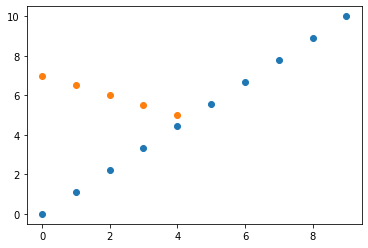

In [31]:
A = np.linspace(0, 10, 10)
B = np.linspace(7, 5, 5)

print(f"The first linspace is {A}.")
print(f"The second linspace is {B}.")

plt.plot(A,'o')
plt.plot(B,'o')

plt.show()

Now, let's multiply 'A' and 'B' by $\alpha = 0.5$ 

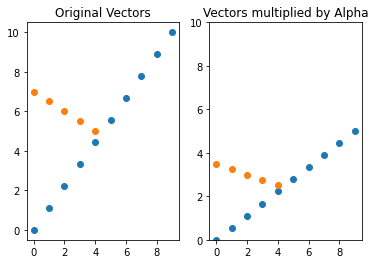

In [32]:
A_2 = 0.5 * A
B_2 = 0.5 * B

fig, axs = plt.subplots(1, 2)

axs[0].plot(A,'o')
axs[0].plot(B,'o')
axs[0].set_title('Original Vectors')

axs[1].plot(A_2, 'o')
axs[1].plot(B_2, 'o')
axs[1].set_ylim([0,10])
axs[1].set_title('Vectors multiplied by Alpha')

plt.show()

The y-values were each multiplied by our $\alpha$ in the second plot, and changed accordingly.

A list of vectors are linear independent if none of them can be written as a linear combination of the others. If they are not linear independent, we say they are linearly dependent.

### 1.2.2: Orthogonality

Orthogonality generally means perpendicular. In linear algebra, say you have two vectors, **u** and **v**. These two vectors are orthogonal if their inner product is 0, that is $\langle u,v \rangle=0$.

First, let's define the inner (dot) product.
Using **u** and **v** from above, the inner product is $\langle u,v \rangle = u \cdot v = \Sigma_i^n u_iv_i$.

Now, there are a special instance of orthogonal vectors which are the orthonormal vectors. In addition to being orthogonal, orthonormal vectors have a magnitude of 1 - that is $||u||=\sqrt{\Sigma_1^n u_i^2}=1$.

NumPy has functions that can calculate the dot product of two vectors.


In [33]:
#First, we create two vectors.
v1 = np.array([1,-2,4])
v2 = np.array([2,5,2])

#Now we will calculate the dot product using the formula above.
d_prod1 = np.sum(v1*v2)
#NumPy also has a dot product function we can use.
d_prod2 = np.dot(v1,v2)

'''
We can also calculate the length, or magnitude, of each vector
to see if they are orthonormal. First we will calculate it
using the formula above, then use NumPy's formula.
'''
n1 = np.sqrt(np.sum(v1*v1))
n2 = np.sqrt(np.sum(v2*v2))

n_1 = np.linalg.norm(v1, ord=2)
n_2 = np.linalg.norm(v2, ord=2)

print(f"The dot product using the sum function is {d_prod1}.")
print(f"The dot product using the dot function is {d_prod2}.")

print(f"The magnitude of v1 is {n1}.")
print(f"The magnitude of v1 is {n_1}.")
print(f"The magnitude of v2 is {n2}.")
print(f"The magnitude of v2 is {n_2}.")

The dot product using the sum function is 0.
The dot product using the dot function is 0.
The magnitude of v1 is 4.58257569495584.
The magnitude of v1 is 4.58257569495584.
The magnitude of v2 is 5.744562646538029.
The magnitude of v2 is 5.744562646538029.


As we can see, the vectors are orthognal since their dot product is 0; however, they are not orthonormal since the magnitude of the vectors are not 1.

### 1.2.3: Gram-Schmidt Process

The Gram-Schmidt algorithm is used to obtain an orthonormal basis. 
Say you have linearly independent vectors $a_1,...,a_m$. The intent is to find an orthonormal basis of $\text{span}(a_1,...,a_m)$. Basically, we add the vectors $a_i$ one by one after taking out their orthogonal projection.

Gram-Schmidt Theorem: Let $a_1,...,a_m$ in $\mathbb{R}^n$ be linearly independent, Then there exists an orthonormal basis $q_1,...,q_m$ of $\text{span}(a_1,...,a_m)$.

So $u_i=v_i-\frac{\langle u_1,v_i \rangle}{\langle u_1,u_1 \rangle}\cdot u_1-\frac{\langle u_2,v_i \rangle}{\langle u_2,u_2 \rangle}\cdot u_2-....-\frac{\langle u_{i-1},v_i \rangle}{\langle u_{i-1},u_{i-1} \rangle}\cdot u_{i-1}$

In [34]:
m = np.array([[1,1,1],[1,1,0], [1,0,0]])

Q, R = np.linalg.qr(m)
Q, R

(array([[-5.77350269e-01, -4.08248290e-01, -7.07106781e-01],
        [-5.77350269e-01, -4.08248290e-01,  7.07106781e-01],
        [-5.77350269e-01,  8.16496581e-01,  1.11733506e-17]]),
 array([[-1.73205081, -1.15470054, -0.57735027],
        [ 0.        , -0.81649658, -0.40824829],
        [ 0.        ,  0.        , -0.70710678]]))

### 1.2.4: Eigenvalues and Eigenvectors

Eigenvectors, also known as characteristic vectors, are a nonzero vector that changes at most by a scalar ($\alpha$) factor when that linear transformation is applied to it. The eigenvalue, denoted by $\lambda$, is the factor by which the eigenvector is scaled.

NumPy has a function to find eigenvalues and eigenvectors, call ```eig```.



In [35]:
a = np.array([[0,2],[2,3]])
w,v = np.linalg.eig(a)
print(f"The original matrix is: \n {a}")
print(f"The eigenvalue is: \n {w}")
print(f"The eigenvector is: \n {v}")

The original matrix is: 
 [[0 2]
 [2 3]]
The eigenvalue is: 
 [-1.  4.]
The eigenvector is: 
 [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


## 1.3: Linear Regression

### 1.3.1: QR Decomposition

QR decomposition of a matrix is a decomposition of the matrix into an orthogonal matrix (**Q**) and a triangular matrix (**R**). There are several methods to go about this decomposition, one being the Gram-Schmidt process. 



In [36]:
m_a = np.array([[1,1,0],[1,0,1],[1,0,0]])

q, r = np.linalg.qr(m_a)

print(f"The original matrix is: \n {m_a}")
print(f"Q is: \n {q}")
print(f"R is: {r}")

The original matrix is: 
 [[1 1 0]
 [1 0 1]
 [1 0 0]]
Q is: 
 [[-5.77350269e-01  8.16496581e-01 -6.99362418e-17]
 [-5.77350269e-01 -4.08248290e-01 -7.07106781e-01]
 [-5.77350269e-01 -4.08248290e-01  7.07106781e-01]]
R is: [[-1.73205081 -0.57735027 -0.57735027]
 [ 0.          0.81649658 -0.40824829]
 [ 0.          0.         -0.70710678]]


This is done on a 3 by 3 matrix. Now we will look at a non-square matrix.

In [37]:
m_a = np.array([[1,1,0],[1,0,1],[1,0,0],[1,1,4]])

q, r = np.linalg.qr(m_a)

print(f"The original matrix is: \n {m_a}")
print(f"Q is: \n {q}")
print(f"R is: \n {r}")

The original matrix is: 
 [[1 1 0]
 [1 0 1]
 [1 0 0]
 [1 1 4]]
Q is: 
 [[-0.5         0.5        -0.68599434]
 [-0.5        -0.5         0.17149859]
 [-0.5        -0.5        -0.17149859]
 [-0.5         0.5         0.68599434]]
R is: 
 [[-2.         -1.         -2.5       ]
 [ 0.          1.          1.5       ]
 [ 0.          0.          2.91547595]]


We are still able to use NumPy's function to decompose the matrix.

###1.3.2: Least-squares Problems

A least squares problem is when there is no solution to the linear system. Instead, it gives the closest approximate solution to the system, $A\vec{x}=\vec{b}$.

To solve for the least-squares, $\vec{x^*}$, we transpose matrix $A$, written as $A^T$. The resulting formula gives us our least-squares solution: $$A^TA\vec{x^*}=A^T\vec{b}$$

The least squares is used to determine the line of best fit, described in 1.3.3.

###1.3.3: Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. On a graph, the linear regression line is also called the line of best fit.


An example of linear regression is shown below.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


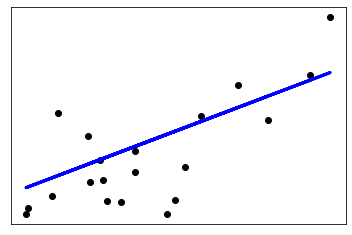

In [38]:
#Code from scikit-learn.org
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()